Text(0.5, 1.0, 'Time Domain Signal x(t)')

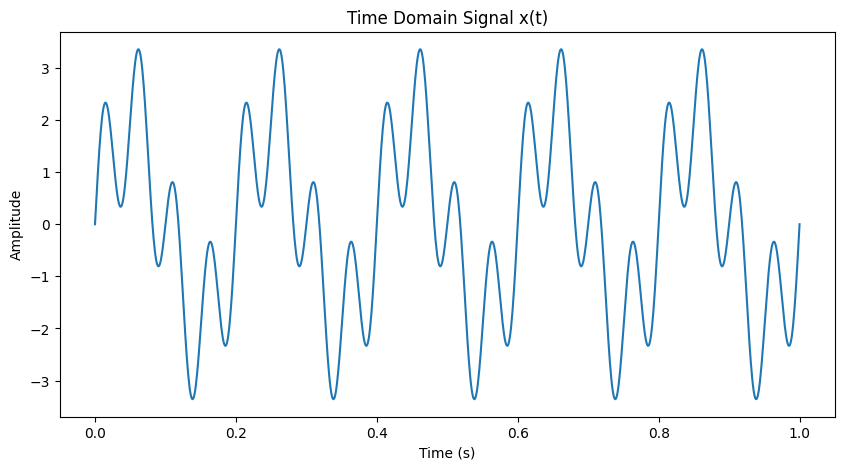

In [5]:
"""
A lecture for illustrating the ifft
"""

import numpy as np
import matplotlib.pyplot as plt


# Generate a sample time domain signal x(t)
# Time values from 0 to 1 with 1000 points
t = np.linspace(0, 1, 1000)  
# Frequency of the first sinusoidal component
frequency1 = 5  
# Frequency of the second sinusoidal component
frequency2 = 20  

intensity = 2 * np.sin(2 * np.pi * frequency1 * t) + 1.5 * np.sin(2 * np.pi * frequency2 * t)

# Perform Fourier Transform on the signal x(t)
fft_intensity = np.fft.fft(intensity)
# Compute the frequency axis for plotting the frequency domain signal
freq_axis = np.fft.fftfreq(len(t), t[1] - t[0])

# Plot the time domain signal
plt.figure(figsize=(10, 5))
plt.plot(t, intensity)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal x(t)')

Text(0.5, 1.0, 'Frequency Domain Signal X(f)')

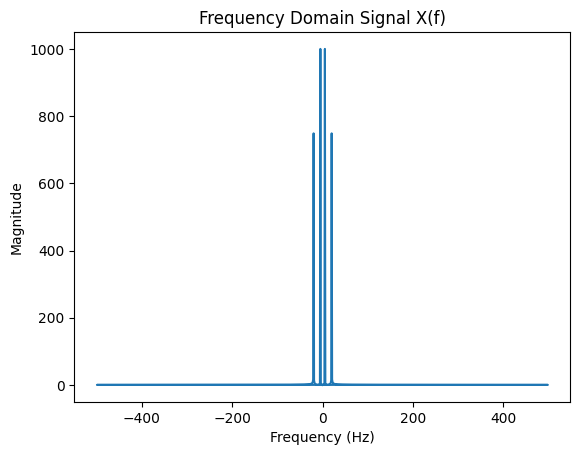

In [6]:
# Plot the frequency domain signal
plt.plot(freq_axis, np.abs(fft_intensity))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Signal X(f)')

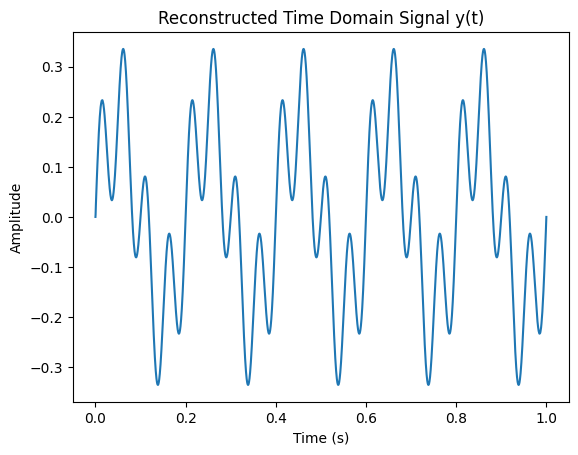

In [10]:
# Perform Inverse Fourier Transform to obtain the time domain signal intensity
rel_dis, I = inverse_fourier_transform(freq_axis, fft_intensity, 1)

# Plot the reconstructed time domain signal
# take the real part 
plt.plot(rel_dis, I.real)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time Domain Signal y(t)')
plt.show()

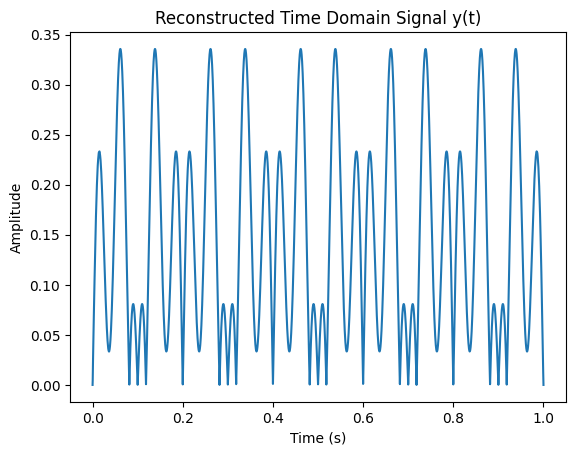

In [11]:
# Perform Inverse Fourier Transform to obtain the time domain signal intensity
rel_dis, I = inverse_fourier_transform(freq_axis, fft_intensity, 1)

# Plot the reconstructed time domain signal
plt.plot(rel_dis, abs(I))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Time Domain Signal y(t)')
plt.show()

In [9]:
def inverse_fourier_transform(Kpoint, Intensity, real_point):
    # Calculate the frequency resolution
    df = Kpoint[1] - Kpoint[0]
    # Define the time range for the inverse Fourier transform
    num_points = len(Kpoint) * 10
    rel_dis = np.linspace(0, real_point, num_points)
    # Initialize the inverse Fourier transform result (time domain signal)
    y = np.zeros(num_points, dtype=np.complex128)
    # Perform the inverse Fourier transform
    for k in range(len(Kpoint)):
        y += df * Intensity[k] * np.exp(2j * np.pi * Kpoint[k] * rel_dis)
    return rel_dis, y/num_points